Task 1

In [131]:
import numpy as np

def generate_inter_arrivals(lam):
    return np.random.exponential(scale = 1/lam)

def generate_length_of_stay(mean_length):
    return np.random.exponential(scale = mean_length)


def simulate_arrival_time(lam, n_days):
    arrival_sum = 0
    times = []
    while arrival_sum < n_days:
        new_time = generate_inter_arrivals(lam)
        arrival_sum += new_time
        times.append(new_time)
    
    times = np.array(times)
    arrival_times = np.cumsum(times)
    return arrival_times

def choose_new_ward(i, P):
    prob = P[i,:]
    choices = P.shape[0]
    new_ward = np.random.choice(np.arange(0,choices), p= prob)
    return new_ward

def generate_list_of_arrivals(arrival_times, keys):
    arrival_tuples = []
    for i, key in enumerate(keys):
        for t in arrival_times[i]:  
            arrival_tuples.append((t, key)) 

    arrival_tuples.sort(key=lambda x: x[0])
    return arrival_tuples 

def add_leaving_time(leaving_times, leaving_time_and_ward):
    leaving_times.append(leaving_time_and_ward)
    leaving_times.sort(key=lambda x: x[0])

def remove_free_beds(leaving_times, arr_time, available_beds):
    to_remove = [lt for lt in leaving_times if arr_time >= lt[0]]
    for lt in to_remove:
            leaving_times.remove(lt)
            available_beds[lt[1]] += 1

def handle_patient(available_beds, leaving_times, arr_time, next_ward, mean_length):
    available_beds[next_ward] -= 1
    degency_time = generate_length_of_stay(mean_length[next_ward])
    leaving_time = arr_time + degency_time
    add_leaving_time(leaving_times, (leaving_time, next_ward))

def compute_day(arr_time):
    day = int(np.floor(arr_time))
    return day


In [132]:
P = np.array([
    [0.00, 0.05, 0.10, 0.05, 0.80],
    [0.20, 0.00, 0.50, 0.15, 0.15],
    [0.30, 0.20, 0.00, 0.20, 0.30],
    [0.35, 0.30, 0.05, 0.00, 0.30],
    [0.20, 0.10, 0.60, 0.10, 0.00],
    ])




In [ ]:
# Simulate
def simulate(lams, mean_length, n_days, available_beds):


    arrival_times = [simulate_arrival_time(lam, n_days) for lam in lams]
    wards = np.arange(0, P.shape[1])
    event_list = generate_list_of_arrivals(arrival_times, wards)
    leaving_times = []
    rejected_patients = np.zeros(n_days)
    total_rejected = [0]
    available_beds_matrix = available_beds.reshape(1, -1)  # Shape: (1, n_wards)
    days = []

    for j in range(len(event_list)):
        arr_time, next_ward = event_list[j]
        day = compute_day(arr_time)
        days.append(day)
        
        if j >= 1:
            previous_day = compute_day(event_list[j-1][0])
        else: previous_day = 0

        # Remove patients who have already left before the current arrival time
        remove_free_beds(leaving_times, arr_time, available_beds)
            

        # Check if there are avaiable beds
        if available_beds[next_ward] > 0:
            handle_patient(available_beds, leaving_times, arr_time, next_ward, mean_length)
        # If there are no beds available, send the patient to another ward with probability p_ij
        else:
            next_ward =  choose_new_ward(next_ward, P)
            if available_beds[next_ward] > 0:
                handle_patient(available_beds, leaving_times, arr_time, next_ward, mean_length)
                #print('patient handled by another ward')
            else: 
                rejected_patients[day] += 1
                total_rejected.append(total_rejected[-1]+1)
                #print('patient rejected')
                continue
       
        available_beds_matrix = np.vstack([available_beds_matrix, available_beds.reshape(1, -1)])

    return available_beds_matrix, rejected_patients

In [160]:
lams = [14.5, 11.0, 8.0, 6.5, 5.0]

mean_length = [2.9, 4.0, 4.5, 1.4, 3.9]

n_days = 365

available_beds = np.array([55, 40, 30, 20, 20])

available_beds_matrix, rejected_patients = simulate(lams, mean_length, n_days, available_beds)

In [161]:
#print(available_beds_matrix)
print(rejected_patients)

[ 0.  0.  0.  0.  0.  6.  1.  0.  3.  2.  0.  2.  0.  0.  0.  0.  0.  0.
  5.  5.  6.  0.  4.  8.  3.  0. 10.  0.  2.  0.  0.  0.  3.  1.  1.  2.
  0.  0.  0.  0.  2. 11.  5.  2. 11.  0.  0.  0.  0.  0.  4.  0.  0.  0.
  0.  1.  3.  0.  2.  6.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  5.
  2.  1.  1.  2.  5.  5.  1.  0.  0.  0.  6.  2.  0.  4.  3.  4.  2.  3.
  0.  0.  5.  0.  6.  1.  2.  8.  8.  0.  3.  0.  1.  0.  0.  0.  0.  2.
  0.  1.  1.  0.  9.  0.  2.  2.  0.  3.  2.  3.  3.  0.  5.  2.  0.  0.
  0.  0.  1.  5.  3.  1.  3.  7.  2.  5.  1.  2.  2. 10.  5.  1.  0.  2.
  0.  2.  0.  1.  0.  6.  7.  7.  4.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.  1.  6.  2.  3. 12.  9.  5.  0.
  2.  1.  0.  0.  0.  0.  0.  4.  2.  0.  0.  2.  2.  0.  0.  6.  2.  0.
  0.  4.  1.  0.  3.  0.  1.  1.  0.  0.  0.  0.  4.  5.  1.  2.  5. 12.
  1.  3.  7.  6.  1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  6. 20.
  5.  3.  1.  2.  0.  2.  1.  3.  2.  2.  3.  6.  0

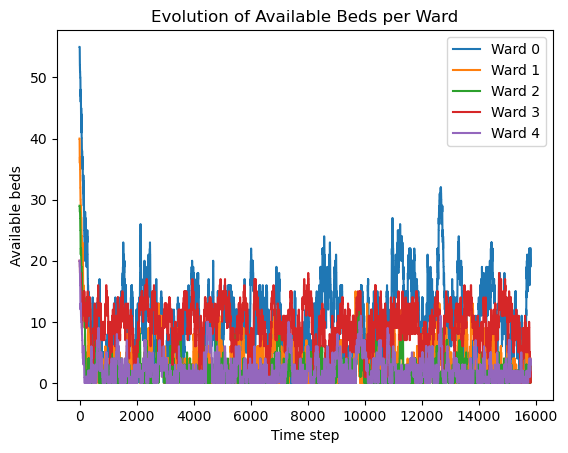

In [162]:
import matplotlib.pyplot as plt

for ward_idx in range(available_beds_matrix.shape[1]):
    plt.plot(available_beds_matrix[:, ward_idx], label=f'Ward {ward_idx}')
plt.xlabel('Time step')
plt.ylabel('Available beds')
plt.title('Evolution of Available Beds per Ward')
plt.legend()
plt.show()


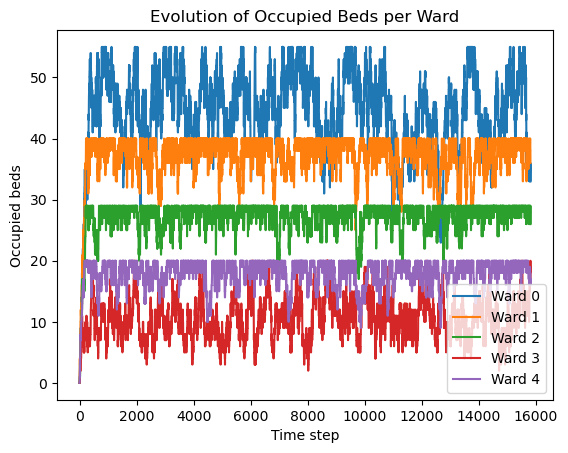

In [163]:
initial_beds = available_beds_matrix[0]
occupied_beds_matrix = initial_beds - available_beds_matrix

for ward_idx in range(occupied_beds_matrix.shape[1]):
    plt.plot(occupied_beds_matrix[:, ward_idx], label=f'Ward {ward_idx}')
plt.xlabel('Time step')
plt.ylabel('Occupied beds')
plt.title('Evolution of Occupied Beds per Ward')
plt.legend()
plt.show()

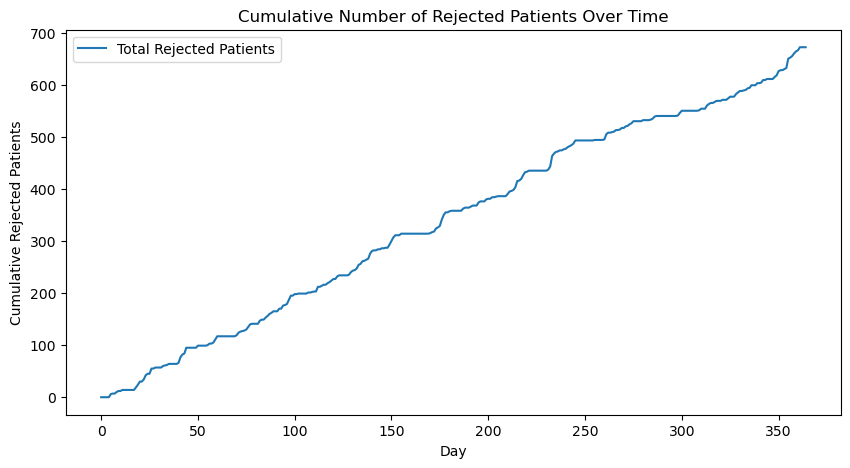

In [164]:
total_rejected = np.cumsum(rejected_patients)
plt.figure(figsize=(10, 5))
plt.plot(total_rejected, label='Total Rejected Patients')
plt.xlabel('Day')
plt.ylabel('Cumulative Rejected Patients')
plt.title('Cumulative Number of Rejected Patients Over Time')
plt.legend()
plt.show()